# Report on Predicting Hotel bookings cancellations

## The following report is divided into 6 stages:

* Background - Gives context to this report
* Data Import Info - Description and importing of the data being analyzed
* Data Validation and Cleaning - Veryfing the integrity and tidiness of the data
* Exploratory Analysis - Trying to understand the variables and their relationships in a statistics point of view
* Predictions - Applying Machine Learning to the problem in hand to find an answer
* Recommendations and Insights - Extracting the nectar from the pollen (as in extracting the essential insights from the data)

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## 📥 Data Import Info

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
#Importing data
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## ✅ Data Validation and Cleaning

In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

As per below, no relevant patterns were found in the missing data, leading me to believe values are MCAR (Missing Completeley at Random). Note that for all the missing values of "no_of_children", they are also missing in the "required_car_parking_space", but not the other way around, so I decided to disregard this fact.

All the columns despite "Booking_ID" and "booking_status" have missing values, the data imputation occured as follow:
* __no_of_adults__ - median
* __no_of_children__ - 0
* __no_of_weekend_nights__ - median
* __no_of_week_nights__ - median
* __type_of_meal_plan__ - "Meal Plan 1"
* __required_car_parking_space__ - 0
* __room_type_reserved__ - "Room_Type 1"
* __lead_time__ - median
* __market_segment_type__ - Since there is a fair amount of "Offline" class, I decided to assign the word "unknown" to the missing values first, to visualize similarities with both most prevelent market_segment_types. Then changed to "Online", hence the similarity on the boxplot below to the "Online" class
* __repeated_guest__ - 0
* __no_of_previous_cancellations__ - 0
* __no_of_bookings_not_canceled__ - 0
* __avg_price_per_room__ - median
* __no_of_special_requests__ - 0

Dates will not be imputed with meaningfull values. For the time being, missing values will be replaced with 0, since later they will be droped for the purpose of predictions.
* __arrival_year__ - 0
* __arrival_month__ - 0
* __arrival_date__ - 0

Median was chosen over the median for two reasons:
* Some values do not make sense with mean (for example: 1.85 adults per booking)
* Presence of outliers in those variables

In [3]:
#Checking for missing values and data types
print(hotels.isna().sum())
print(hotels.info())

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column            

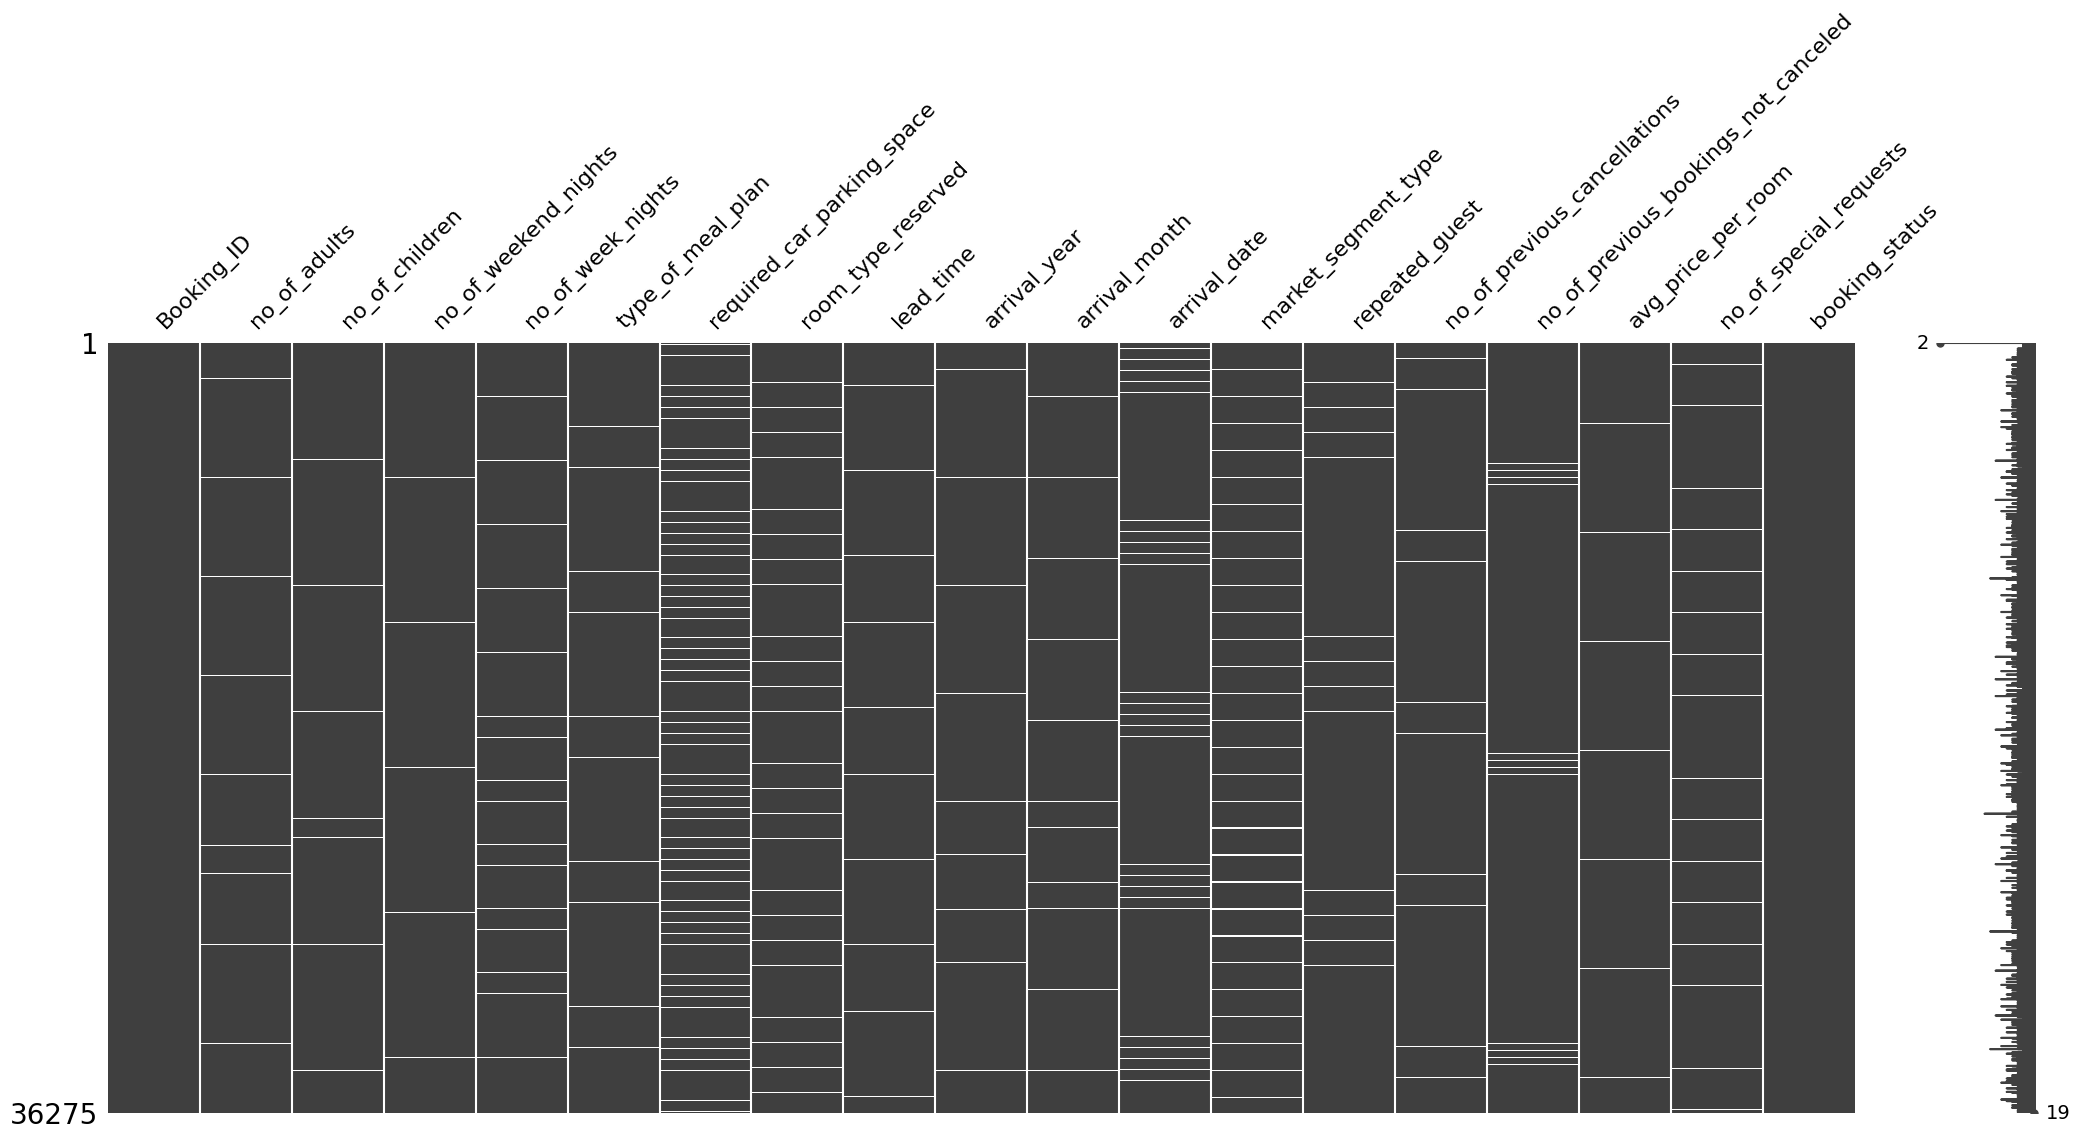

In [4]:
#Visualizing missing values
msno.matrix(hotels)
plt.show()

In [5]:
#Analyzing distribution of numeric variables
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
#Deleting first observation with all NaNs
hotels = hotels.drop(0)

#Median imputation
hotels["no_of_adults"] = hotels.no_of_adults.fillna(hotels.no_of_adults.median())
hotels["no_of_weekend_nights"] = hotels.no_of_weekend_nights.fillna(hotels.no_of_weekend_nights.median())
hotels["no_of_week_nights"] = hotels.no_of_week_nights.fillna(hotels.no_of_week_nights.median())
hotels["lead_time"] = hotels.lead_time.fillna(hotels.lead_time.median())
hotels["avg_price_per_room"] = hotels.avg_price_per_room.fillna(hotels.avg_price_per_room.median())

#0 imputation
hotels = hotels.fillna(0)

#String imputation
hotels["type_of_meal_plan"] = hotels.type_of_meal_plan.replace({0 : "Meal Plan 1"})
hotels["room_type_reserved"] = hotels.room_type_reserved.replace({0 : "Room_Type 1"})
hotels["market_segment_type"] = hotels.market_segment_type.replace({0 : "Unknown"})

#Show results
print(hotels.isna().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


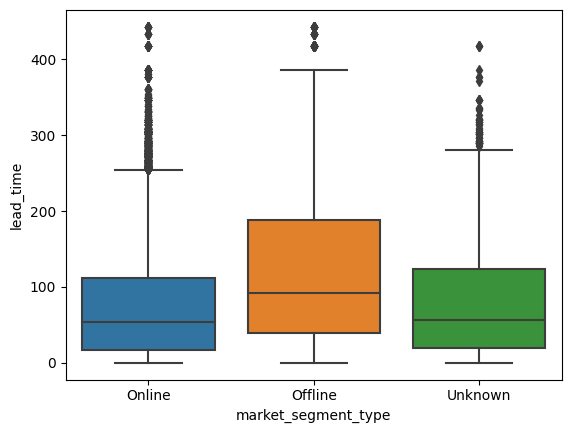

Online           0.613773
Offline          0.277775
Corporate        0.053096
Unknown          0.041655
Complementary    0.010338
Aviation         0.003363
Name: market_segment_type, dtype: float64


In [7]:
#Checking for distribution similarities between most prevelant classes of the "market_segment_type" and Unknown class
hotels_market_segment_type = hotels[(hotels["market_segment_type"] == "Online") | (hotels["market_segment_type"] == "Offline") | (hotels["market_segment_type"] == "Unknown")]
sns.boxplot(x = "market_segment_type", y = "lead_time", data = hotels_market_segment_type)
plt.show()

#Show results
print(hotels.market_segment_type.value_counts(normalize = True))

In [8]:
#Changing Unknown class to the Online class with a higher degree of certainty
hotels["market_segment_type"] = hotels.market_segment_type.replace({"Unknown" : "Online"})

## 📊 Exploratory Analysis

Upon reading the correlation matrix, the highest correlation is mild, between the variables "no_of_previous_bookings_not_cancelled" and "repeated guest".

Regarding the variable of interest, there is a mild class imbalance, with 32.76%.

One curious note is that in 2018, we can see more people booking in said hotel, but a disproportionate increase in canceled bookings as well, with more than half of the bookings being canceled.
While going deeper in 2018, we can see that the hotter the months in the Northern Hemisphere, the higher tendency to cancel the booking. Perhaps being the months where people have their vacations the most, as we can see for the highest cancelation months in relation to bookings - August, September and October.

We can observe further in the histogram of the leadtime over target variable classes that the less time ahead is it made, the higher the probability of not being canceled. However, nothing can be said about the class of interest, since it reseambles an uniform distribution.

Trying to understand if between years was there a great increase of canceled bookings per market_segment_type, we can observe that the Offline class median increased the most from slightly over 100 to almost 250.




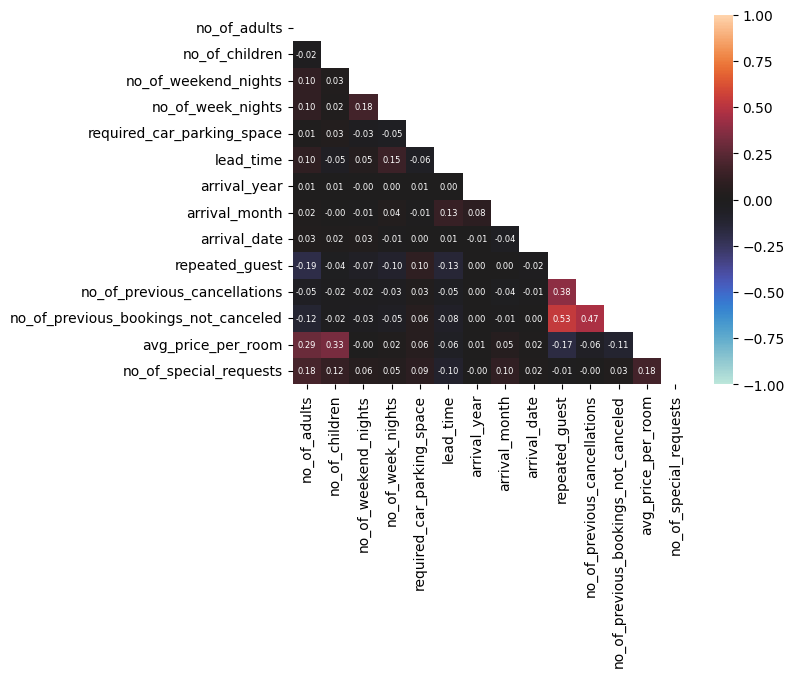

In [9]:
#Analyzing correlation matrix
mask = np.triu(np.ones_like(hotels.corr()))
sns.heatmap(hotels.corr(), annot = True, vmax = 1, vmin = -1, center = 0, mask = mask, annot_kws= {"fontsize" : 6}, fmt=".2f")
plt.show()

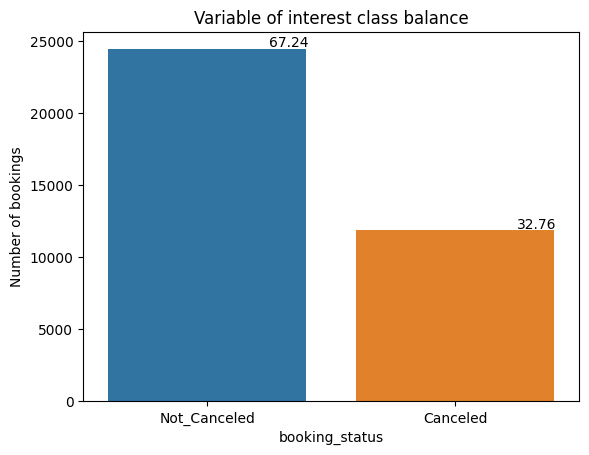

In [10]:
#Plotting target variable proportions
hotels_booking_status = hotels.booking_status.value_counts(normalize = True)
sns.countplot(x = "booking_status", data = hotels)
plt.title("Variable of interest class balance")
plt.ylabel("Number of bookings")
plt.annotate(round(hotels_booking_status[0] * 100, 2), xy = (0, 2000), xytext = (0.25, 24600))
plt.annotate(round(hotels_booking_status[1] * 100, 2), xy = (0, 2000), xytext = (1.25, 12000))
plt.show()

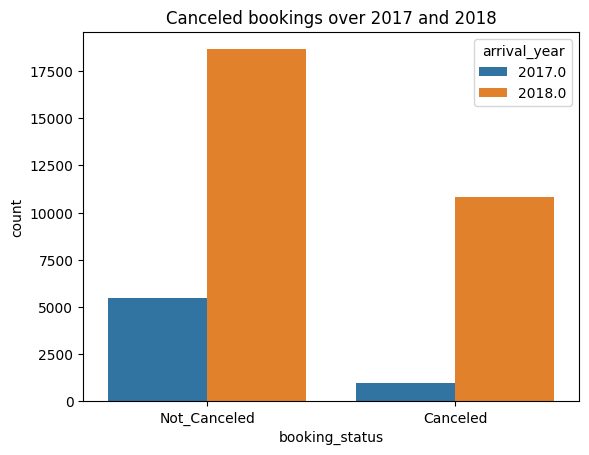

In [11]:
#Analysing cancelled bookings per year
sns.countplot(x = "booking_status", hue = "arrival_year", data = hotels[hotels["arrival_year"] != 0])
plt.title("Canceled bookings over 2017 and 2018")
plt.show()

In [12]:
#Separating data from both years
hotels_2018_by_month = hotels[(hotels.arrival_year == 2018) & (hotels.arrival_month != 0)]\
                                                            .sort_values("booking_status", ascending = False)

hotels_2017_by_month = hotels[(hotels.arrival_year == 2017) & (hotels.arrival_month != 0)]\
                                                            .sort_values("booking_status", ascending = False)

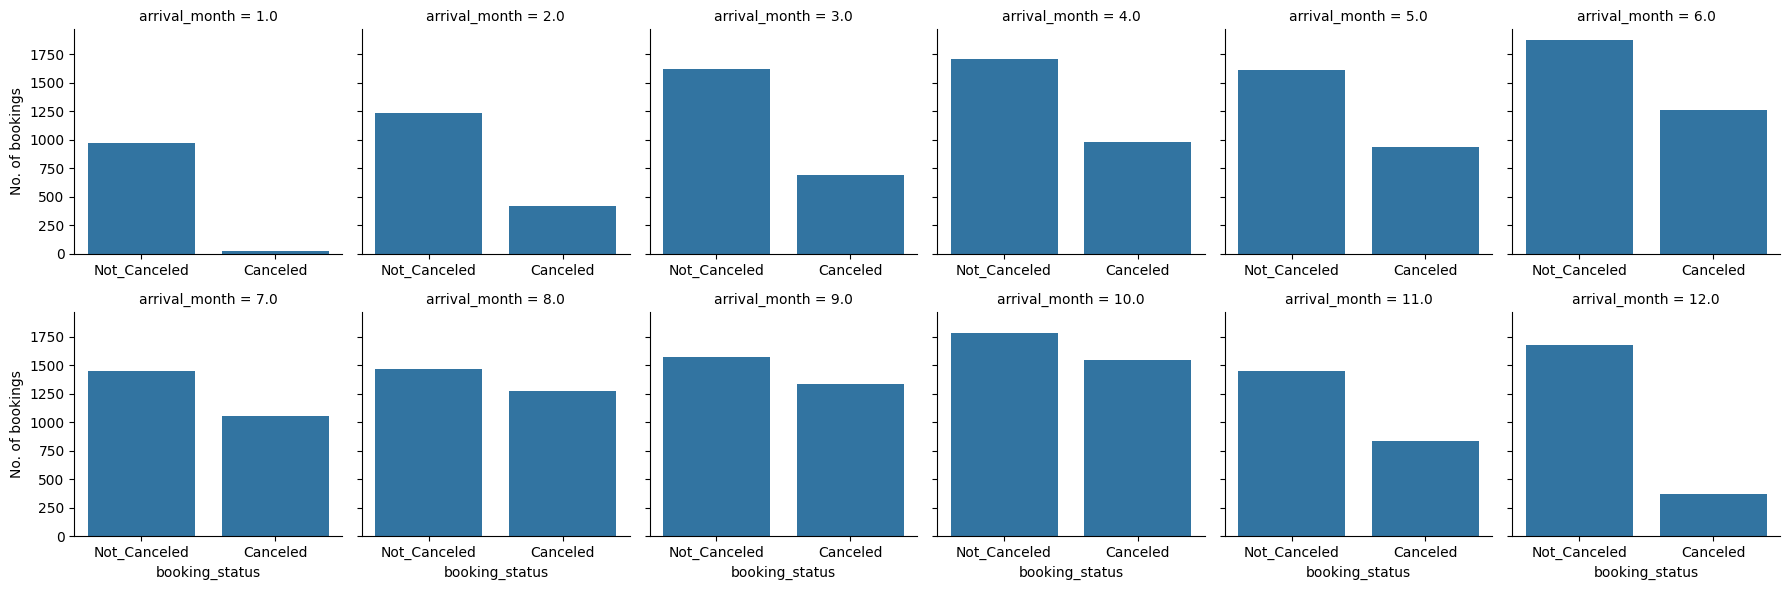

In [13]:
#Analysing 2018 canceled bookings per month
g = sns.FacetGrid(hotels_2018_by_month, col = "arrival_month", col_wrap = 6, sharex = False,)
g.map(sns.countplot, "booking_status")
g.set_ylabels("No. of bookings")
plt.show()

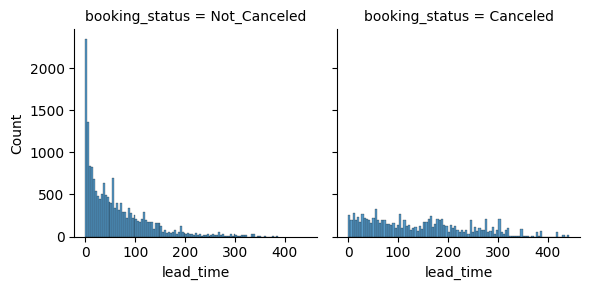

In [14]:
#Analyzing the time the booking was booked ahead between target variable classes, in 2018
g2= sns.FacetGrid(hotels_2018_by_month, col = "booking_status")
g2.map(sns.histplot, "lead_time", bins = 100)
plt.show()

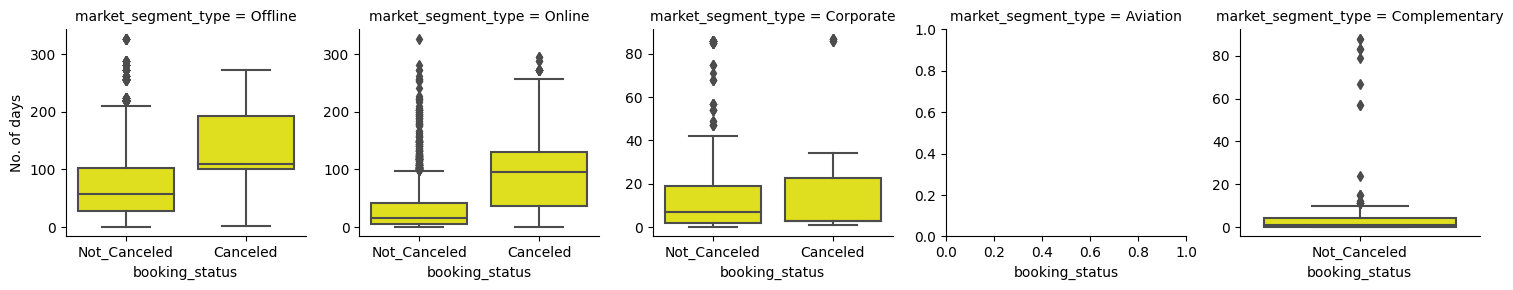

In [15]:
#Analyzing the relationship between the time the booking was booked ahead and market_segment_type in 2017
g3 = sns.FacetGrid(hotels_2017_by_month, col = "market_segment_type", sharey = False, sharex = False, col_order = ["Offline", "Online", "Corporate", "Aviation", "Complementary"])
g3.map(sns.boxplot, "booking_status", "lead_time", color = "yellow")
g3.set_ylabels("No. of days")
plt.show()

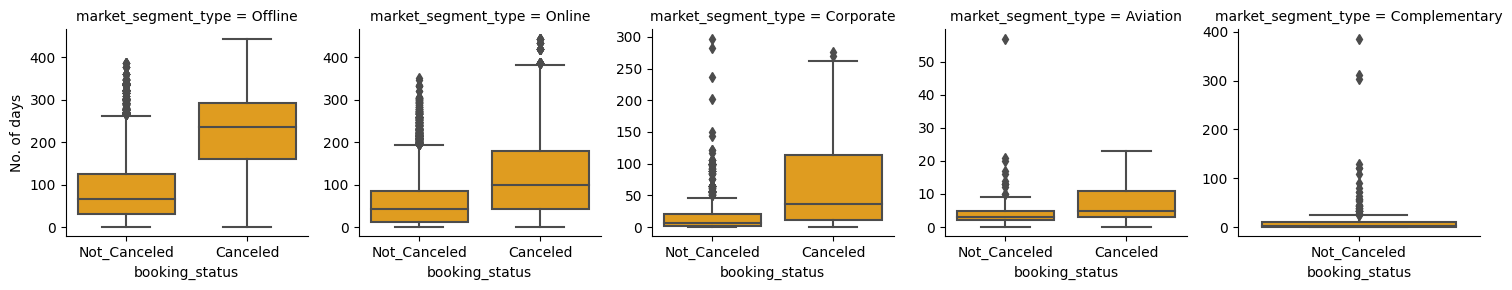

In [16]:
#Analyzing the relationship between the time the booking was booked ahead and market_segment_type in 2018
g3 = sns.FacetGrid(hotels_2018_by_month, col = "market_segment_type", sharey = False, sharex = False, col_order = ["Offline", "Online", "Corporate", "Aviation", "Complementary"])
g3.map(sns.boxplot, "booking_status", "lead_time", color = "orange")
g3.set_ylabels("No. of days")
plt.show()

## 🔮 Predictions

After pre-processing data, two base models were run - a __CART__ and a __Random Forest__
The most important predictors of the target variable were also displayed, so they could be used in a more simpler, easier to understand __CART__

Answering the question purposed by the Hotel Business, the most important predictor variables were:
1. "lead_time"
2. "avg_price_per_room"
3. "no_of_special_requests"
4. "no_of_week_nights"
5. "no_of_weekend_nights"

In favour of interpretability, the Decision Tree (CART) graph below was pruned to have a depth of 4, sacrificing some accuracy.
Essentially, we see more darker shades of red on the left side of the tree, and darker shades of blue in the right side. The darker the color, the more certain the model is of the class in question. Adding to that, the darker red nodes and leafs on the right said are smaller in sample size, meaning there exists several niches of customers that do not follow the majority trend of lead_time and avg_price_per_room decision splits.

The graph will facilitate Marketeers and Business Developers to understand how the most important predictors interact with eachother, thus enabling campaigns and strategies that improve booking retention.

As an extra, <ins>if the Hotel Business wants to know which customers to target the campaign</ins>, the __untunned__ Random Forest model can serve as a good indicator of whom will Cancel and Not_Cancel, having an accuracy of 88%, with good precision and recall values.

<ins>If the Management wants to be absolutely sure that the people being targeted will Cancel</ins>, the __tunned__ Random Forest model, although with smaller accuracy of 73% and terrible recall (meaning it missclassifies bookings has "Not_canceled"), it assures that the predicted class of "Canceled" is 97% correct.



In [17]:
#Transforming target variable to numeric values for the models to run
hotels["booking_status"] = hotels["booking_status"].replace({"Not_Canceled" : 0,
                                                             "Canceled" : 1})

#Preprocessing data
from sklearn.model_selection import train_test_split
X_dropped = hotels.drop(["arrival_year", "arrival_month", "arrival_date", "Booking_ID", "booking_status"], axis = 1)
y = hotels["booking_status"].values
X = pd.get_dummies(X_dropped)

SEED = 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [18]:
#Running base Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = SEED).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [19]:
#Running base Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = SEED).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

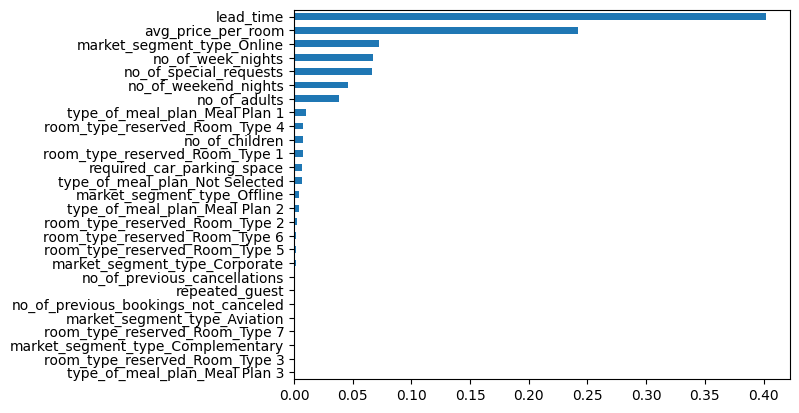

In [20]:
importances_dt = pd.Series(dt.feature_importances_, index = pd.get_dummies(X_dropped).columns).sort_values()
importances_dt.plot(kind = "barh")
plt.show()

### Base model evaluation

In [21]:
#Evaluating Decision Tree model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[6471  843]
 [ 823 2746]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7314
           1       0.77      0.77      0.77      3569

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



In [22]:
#Evaluating Random Forest model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[6793  521]
 [ 802 2767]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7314
           1       0.84      0.78      0.81      3569

    accuracy                           0.88     10883
   macro avg       0.87      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



### Random Forest Parameter tunning for precision scoring

In [23]:
#Random Forest parameter tunning for precision scoring
from sklearn.model_selection import GridSearchCV
params_rf = {
    "n_estimators" : [100, 150, 200],
    "max_depth" : [3, 4, 5],
    "max_features" : ["sqrt", "log2"],
    "min_samples_split" : [30, 50, 70]
}

grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = "precision", n_jobs = -1)
grid_rf.fit(X_train, y_train)
grid_rf.best_estimator_

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=50,
                       n_estimators=200, random_state=9)

In [24]:
#Running tunned Random Forest model
rf_tunned = RandomForestClassifier(n_estimators = 200, max_depth = 3, min_samples_split = 50, max_features = "log2", random_state = SEED).fit(X_train, y_train)
y_pred_rf_tunned = rf_tunned.predict(X_test)

### Tunned Random Forest evaluation

In [25]:
#Evaluating Random Forest model
print(confusion_matrix(y_test, y_pred_rf_tunned))
print(classification_report(y_test, y_pred_rf_tunned))

[[7291   23]
 [2891  678]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      7314
           1       0.97      0.19      0.32      3569

    accuracy                           0.73     10883
   macro avg       0.84      0.59      0.58     10883
weighted avg       0.80      0.73      0.66     10883



### Using the best predictors in a prunned tree

In [26]:
#Using only the best explanatory variables
X_best = X[["lead_time", "avg_price_per_room", \
            "market_segment_type_Online", "no_of_week_nights", \
            "no_of_special_requests"]]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size = 0.3, random_state = SEED)

In [27]:
#Running prunned DecisionTree model
dt_best_predictors = DecisionTreeClassifier(max_depth= 4, random_state = SEED).fit(X_train, y_train)
y_pred_dt_best_predictors = dt_best_predictors.predict(X_test)

In [28]:
#Evaluating Decision Tree model with best predictors
print(confusion_matrix(y_test, y_pred_dt_best_predictors))
print(classification_report(y_test, y_pred_dt_best_predictors))

[[6555  759]
 [1346 2223]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7314
           1       0.75      0.62      0.68      3569

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



### Results

In [29]:
#Plotting the decision tree to better understand how the best predictors interact
from sklearn.tree import plot_tree

feature_names = list(X_best.columns)
class_names = ["Not_canceled", "Canceled"]

plt.figure("Decision Tree", figsize = [15, 6], dpi= 1000)
plot_tree(dt_best_predictors, filled = True, fontsize = 5, feature_names = feature_names, class_names = class_names)
plt.title("Decision tree")
plt.tight_layout()
plt.show()

## ✍🏽 Recommendations and Insights

1. Talk to employees to be more strict in filling up booking forms.
2. If possible gather more data about the customers.
3. Ask the management to conduct a survey on the 2018 customers, that booked a room Offline, with more than 159 days (0.25 quantile) to try and understand what went wrong.
4. The greater the lead_time is, the higher the probability of canceling the booking, specially when the average price per room is greater than 100. It leads me to formulate a testable hypothesis through an experiment: "When customers book a room with more than 5 months ahead, do they encounter cheaper prices closer to date?".
5. Create a discount/ prize based/ deals retention system for people that apply the booking over 5 months of lead time.